In [49]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

In [13]:
data = pd.read_csv('abalone_data.csv')

In [14]:
data.head()

,sex,width,diam,height,weight,weight_without_shell,inner_weight,shell_weight,num_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
is_old = np.array([1 if r >= 18 else 0 for r in data.num_rings])

In [16]:
is_old[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [17]:
np.mean(is_old)

0.03255925305242997

In [18]:
data['is_old'] = is_old

In [19]:
del data['num_rings']

In [20]:
data.sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [21]:
data['M'] = np.array([1 if s == 'M' else 0 for s in data.sex])
data['F'] = np.array([1 if s == 'F' else 0 for s in data.sex])
data['I'] = np.array([1 if s == 'I' else 0 for s in data.sex])

In [22]:
del data['sex']

In [23]:
data.head()

,width,diam,height,weight,weight_without_shell,inner_weight,shell_weight,is_old,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,0,1


In [50]:
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

/Users/aleksandrkondraskin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [51]:
data_scaled.head()

,width,diam,height,weight,weight_without_shell,inner_weight,shell_weight,M,F,I
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,1.0,0.0,0.0
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,1.0,0.0,0.0
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.0,1.0,0.0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,1.0,0.0,0.0
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.0,0.0,1.0


In [24]:
import seaborn as sns

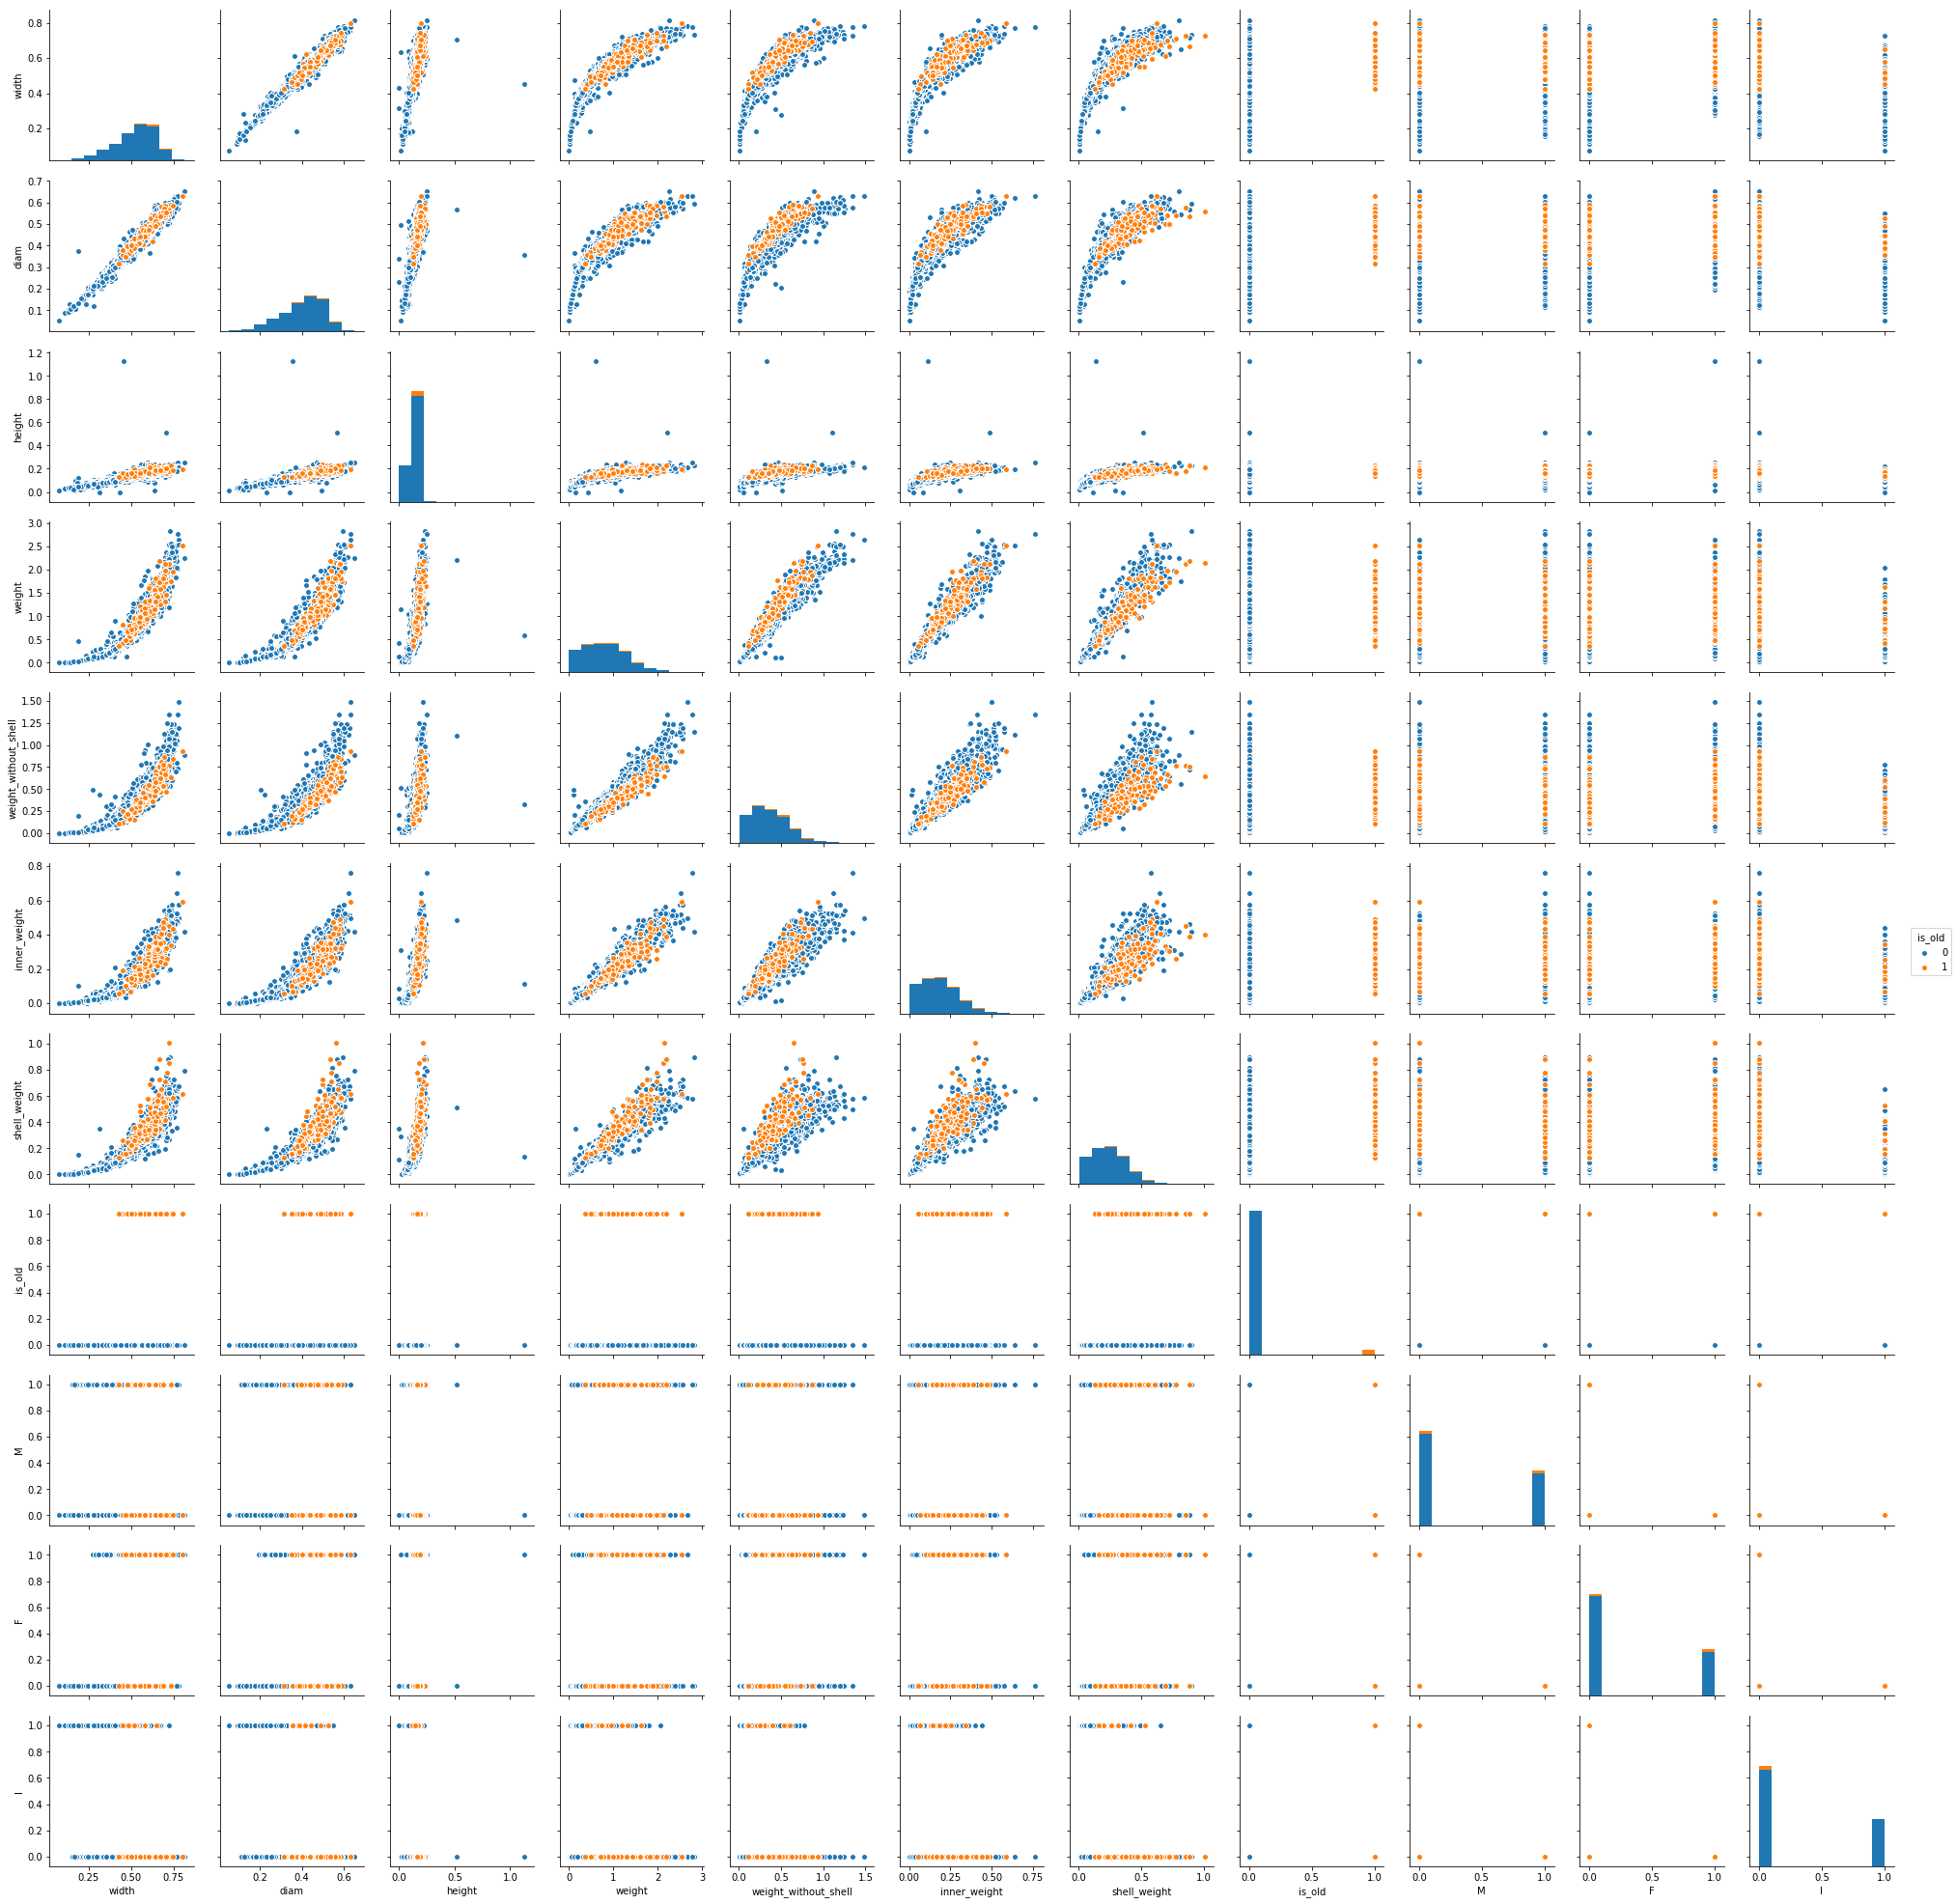

In [25]:
sns.pairplot(data, hue='is_old')

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
y = data['is_old']

In [28]:
del data['is_old']

In [52]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data_scaled, y, \
                                                random_state=42, test_size=0.2)

In [53]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [54]:
model = RandomForestClassifier()
model.fit(Xtrain, Ytrain)

/Users/aleksandrkondraskin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
print(classification_report(Ytest, model.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       803
           1       0.00      0.00      0.00        33

   micro avg       0.96      0.96      0.96       836
   macro avg       0.48      0.50      0.49       836
weighted avg       0.92      0.96      0.94       836



In [56]:
from imblearn.under_sampling import RandomUnderSampler, \
    CondensedNearestNeighbour, TomekLinks
    
from imblearn.over_sampling import SMOTE, ADASYN

from imblearn.combine import SMOTETomek

from imblearn.pipeline import make_pipeline

In [75]:
pipe = make_pipeline(CondensedNearestNeighbour(), RandomForestClassifier())
pipe.fit(Xtrain, Ytrain)
print(classification_report(Ytest, pipe.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       803
           1       0.09      0.06      0.07        33

   micro avg       0.94      0.94      0.94       836
   macro avg       0.53      0.52      0.52       836
weighted avg       0.93      0.94      0.93       836



/Users/aleksandrkondraskin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
